<a href="https://colab.research.google.com/github/ananya1105/Data_Analysis_and_Visualisation-Medical-Insurance-Data-/blob/master/Data_Analysis_and_Visualisation(Medical_Insurance_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The rows and columns in the dataset (1338, 7)
Stastical Analysis of numeric columns                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Columns in the dataset Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
regi

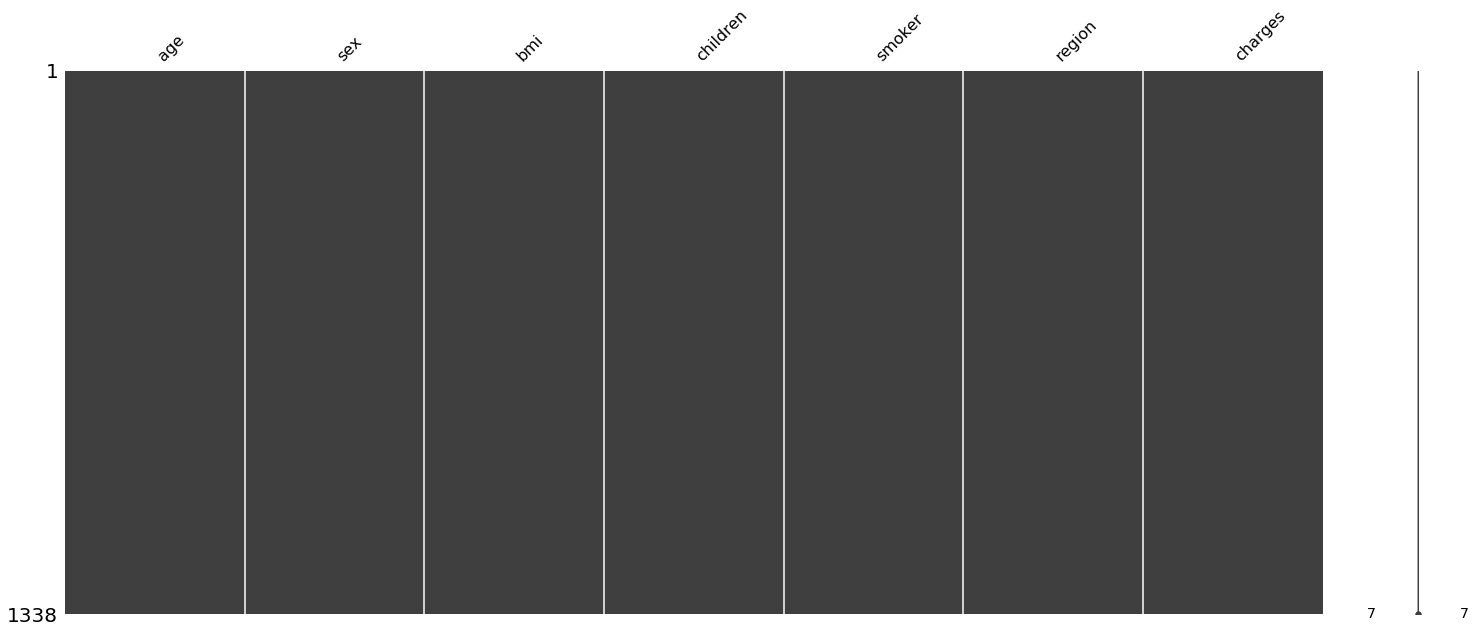

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
df = pd.read_csv('/content/insurance.csv')
print('The rows and columns in the dataset', df.shape)
print('Stastical Analysis of numeric columns', df.describe())
print('Columns in the dataset', df.columns)
print('Information about the dataset',df.info())
msno.matrix(df)
#There are no missing values 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faefe33df60>,
      dtype=object)

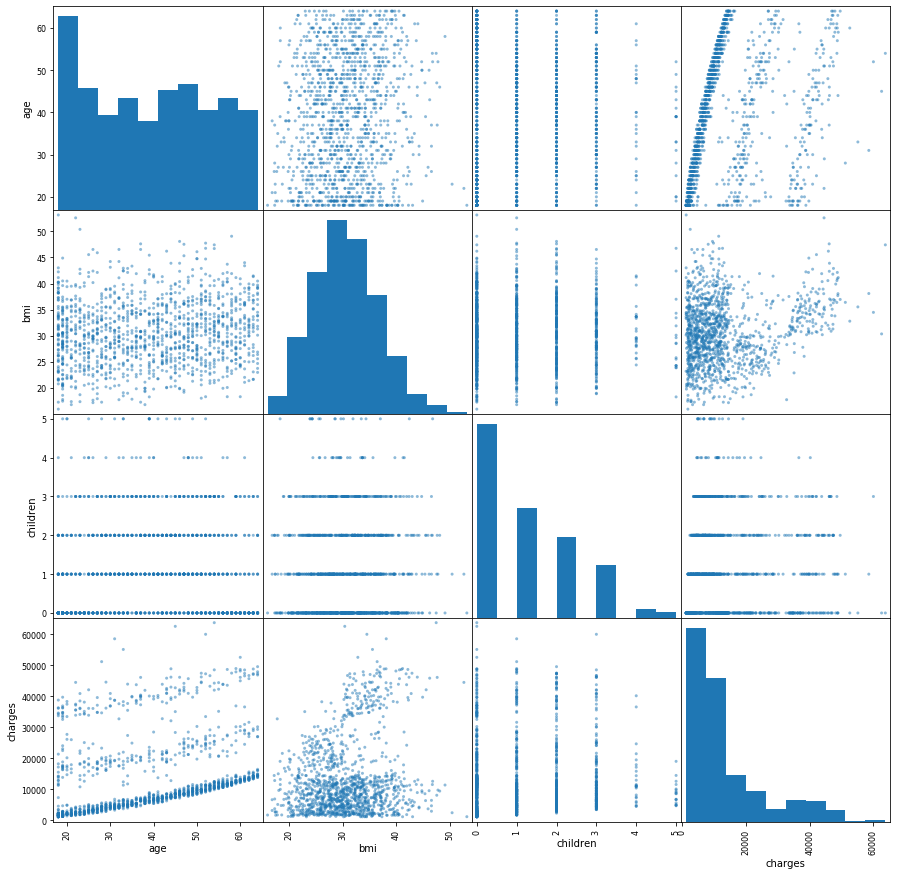

In [2]:
pd.plotting.scatter_matrix(df, figsize = (15,15))

In [3]:
nullity = df.isnull()
print(nullity.sum())
#Checking for duplicate values
dup = df.duplicated(subset = None, keep = 'last')
print(df[dup].index)
#There is 1 duplicate row in the dataset
print(df.index)

print(df.loc[195, :])
#print(df.loc[581,:])
print('Locations 195 and 581 have duplicate values')

#Dropping duplicate values
df.drop_duplicates(inplace = True)
#We have dropped the index 581
#Unique values in the dataset
for i in list(df.columns):
    print(i + ' : ',df[i].unique())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Int64Index([195], dtype='int64')
RangeIndex(start=0, stop=1338, step=1)
age                19
sex              male
bmi             30.59
children            0
smoker             no
region      northwest
charges       1639.56
Name: 195, dtype: object
Locations 195 and 581 have duplicate values
age :  [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex :  ['female' 'male']
bmi :  [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  3

In [4]:
#Correlation matrix
df.corr()
#Converting sex to categorical datatype
df['sex'] = df['sex'].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker        object
region        object
charges      float64
dtype: object

Text(0.5, 0, 'Age Interval')

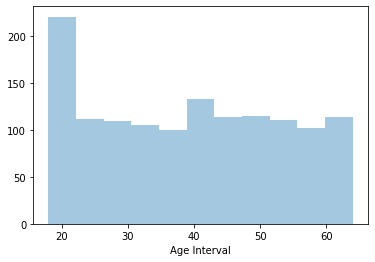

In [5]:
#Constructing heat map for the data frame
age_count = df.groupby(['age']).count()
#df['age'].sns(kind = 'hist', kde = False)
sns.distplot(df['age'], kde = False)
plt.xlabel('Age Interval')

              age        bmi  children       charges
sex                                                 
female  39.503021  30.377749  1.074018  12569.578844
male    38.946667  30.943652  1.117037  13974.998864


Text(0.5, 0, 'Gender')

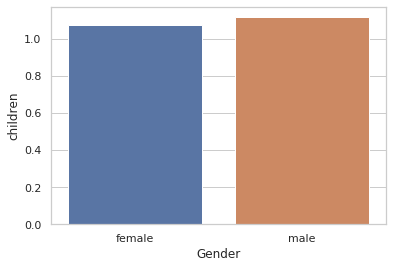

In [6]:
a = df.groupby('sex').mean().sort_values('children')
print(a.head())
sns.set(style="whitegrid")
sns.barplot(a.index,a['children'])
plt.xlabel('Gender')


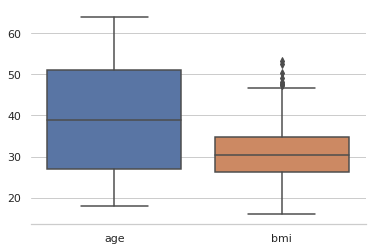

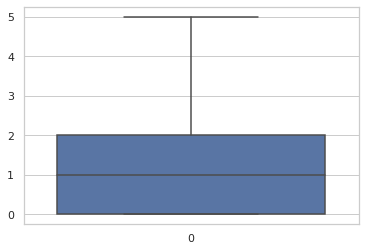

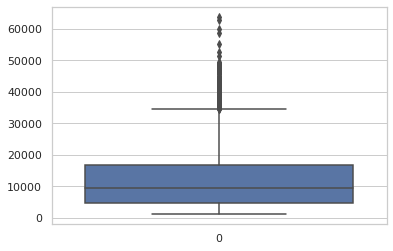

In [7]:
#Box plot for the dataframe
sns.set(style="whitegrid")
sns.boxplot(data = df[['age','bmi']])
sns.despine(left=True)
plt.show()
sns.boxplot(data=df['children'])
plt.show()
sns.boxplot(data= df['charges'])
plt.show()

In [0]:
#Average charges incurred by each age group
import seaborn as sns
a = df.groupby('age').mean().sort_values('charges', ascending = False)

Text(0, 0.5, 'Average Charge')

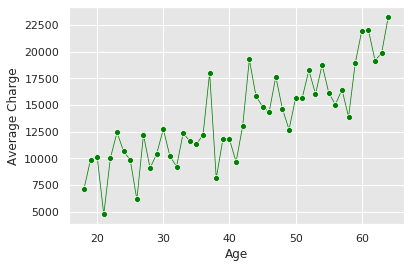

In [10]:
#sns.set_style("dark")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(x=a.index, y=a.charges,marker = 'o', size = 5, color = 'green', label = 'line', legend = False) 
plt.xlabel('Age')
plt.ylabel('Average Charge')

Text(0, 0.5, 'Average bmi')

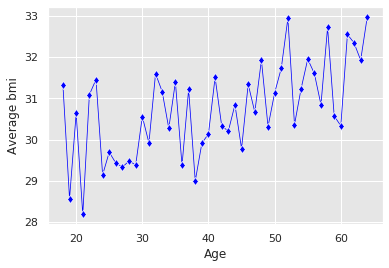

In [11]:
#Is bmi dependent on age group
b= df.groupby('age').mean().sort_values('bmi',ascending = False)


sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(x=b.index, y=b.bmi,marker = 'd', size = 5, color = 'blue', label = 'line', legend = False) 
plt.xlabel('Age')
plt.ylabel('Average bmi')

              age        bmi  children       charges
smoker                                              
no      39.404516  30.651853  1.091251   8440.660307
yes     38.514599  30.708449  1.113139  32050.231832


Text(0.5, 0, 'Charges')

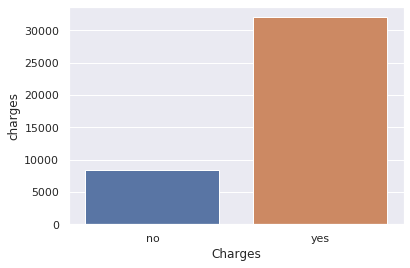

In [12]:
#Are charges incured different for smoker and non smoker
a = df.groupby('smoker').mean().sort_values('charges')
print(a.head())
sns.set(style="darkgrid")
sns.barplot(a.index,a['charges'])
plt.xlabel('Charges')

                 age        bmi  children       charges
region                                                 
southwest  39.455385  30.596615  1.141538  12346.937377
northwest  39.259259  29.195494  1.151235  12450.840844
northeast  39.268519  29.173503  1.046296  13406.384516
southeast  38.939560  33.355989  1.049451  14735.411438


Text(0.5, 0, 'Region')

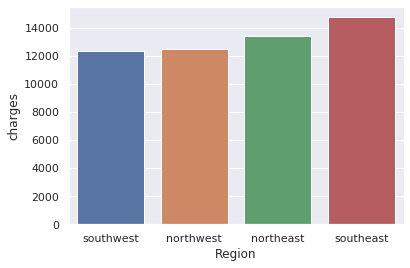

In [13]:
#In which region more charges are incurred
#Are charges incured different for smoker and non smoker
a = df.groupby('region').mean().sort_values('charges')
print(a.head())
sns.set(style="darkgrid")
sns.barplot(a.index,a['charges'])
plt.xlabel('Region')

           age  sex  bmi  children  smoker  charges
region                                             
northeast  324  324  324       324     324      324
northwest  324  324  324       324     324      324
southwest  325  325  325       325     325      325
southeast  364  364  364       364     364      364


Text(0, 0.5, 'Count')

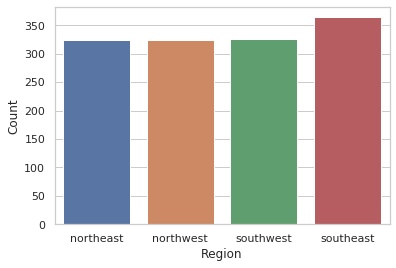

In [14]:
#Which region had more number of people enrolling for medical insurance
a = df.groupby('region').count().sort_values('charges')
print(a.head())
sns.set(style="whitegrid")
sns.barplot(a.index,a['charges'])
plt.xlabel('Region')
plt.ylabel('Count')

         age   sex   bmi  children  region  charges
smoker                                             
yes      274   274   274       274     274      274
no      1063  1063  1063      1063    1063     1063


Text(0, 0.5, 'Count')

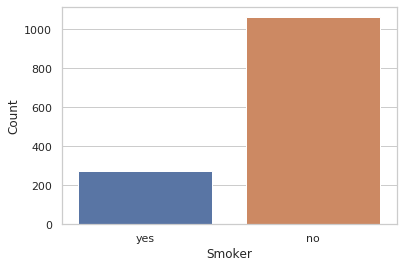

In [15]:
#Were there more number of smokers who enrolled for insurance
a = df.groupby('smoker').count().sort_values('charges')
print(a.head())
#sns.set(style="whitegrid")
sns.barplot(a.index,a['charges'])
plt.xlabel('Smoker')
plt.ylabel('Count')

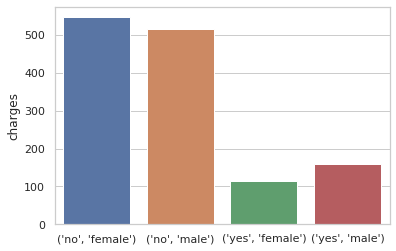

In [16]:
#What is the gender of the people who smoke
a = df.groupby(['smoker', 'sex']).count()
sns.barplot(a.index, a['charges'])